<a href="https://colab.research.google.com/github/ominivac/analise_integraSUS/blob/master/Analise_de_dados_do_IntegraSUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import plotly
import numpy as np
import plotly.offline as py
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [181]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/IntegraSUS/casos_coronavirus_2020_09_09.csv", low_memory=False)

#quantidade de registros
df.shape

(790703, 43)

In [182]:
# Preview dos dados 
df.head(3)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus
0,0,c5bae65935fdb19f4e060e80b4e19035,NaN,CE,230110.0,ARACATI,NaN,FEMININO,59.0,2020-05-06 00:00:00,NaN,NaN,NaN,NaN,NaN,2020-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parda,NaN,NaN,FORTALEZA
1,1,935fa530bd1bec451d80c361c07529e4,NaN,CE,230440.0,FORTALEZA,ALDOETA,FEMININO,42.0,2020-08-27 00:00:00,NaN,NaN,NaN,NaN,NaN,2020-08-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ignorado,NaN,2424568,SOBRAL
2,2,156942983991b9018c9ca86cbad0a179,NaN,CE,230440.0,FORTALEZA,SAPIRANGA,FEMININO,39.0,2020-06-09 00:00:00,NaN,NaN,NaN,NaN,NaN,2020-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parda,NaN,NaN,FORTALEZA


In [183]:
# Tranformar as col. de data no tipo certo
df[["dataNotificacao","dataSolicitacaoExame","dataResultadoExame","dataColetaExame","dataInicioSintomas", "dataObito", "dataNotificacaoObito"]] =  df[["dataNotificacao","dataSolicitacaoExame","dataResultadoExame","dataColetaExame","dataInicioSintomas", "dataObito", "dataNotificacaoObito"]].apply(pd.to_datetime,  errors='coerce')

In [184]:
# Algumas colunas em brancos, contar para sexoPaciente
count = df["sexoPaciente"].isnull().sum()
print(count)

4165


**Salvar com separator ';' pro tableau**

In [185]:
#df.to_csv('/content/drive/My Drive/IntegraSUS/casos_coronavirus_2020_08_16_tableau.csv', sep=';', encoding='UTF-8', index=False)

In [186]:
# Contar para todas colunas quantas registros em branco
# df.isna().sum()

 # Saída para registros com exames positivos
#df[df['resultadoFinalExame'] == 'Positivo'].head()

# Saída para registros sem óbito
#df[ df['obitoConfirmado'] == False ]

# Casos onde o resutado do exame foi positivo e não resultou em óbito
# df[ (df['resultadoFinalExame'] == 'Positivo') & (df['dataObito'].isnull()) ]

In [187]:
 # Ver distribuição de atributos
df['racaCorPaciente'].unique().tolist()

['Parda', 'Ignorado', 'Amarela', nan, 'Branca', 'Preta', 'Indígena']

In [256]:
df['evolucaoCasoSivep'].unique().tolist()

[nan, 'Cura', 'Óbito', 'Ignorado', '3']

In [188]:
# Alterar onde for nan para Não Informado
df['racaCorPaciente'] = df['racaCorPaciente'].fillna('Não Informado')

In [189]:
df['tipoTesteExame'].unique().tolist()

[nan,
 'RT PCR',
 'ELISA',
 'Teste Rápido',
 'Quimioluminescência',
 'Eletroquimioluminescência']

In [190]:
df['comorbidadeDiabetesSivep'].unique().tolist()

[nan, 'Sim', 'Não', 'Ignorado']

In [257]:
df['resultadoFinalExame'].unique().tolist()

[nan, 'Negativo', 'Positivo', 'Em Análise', 'Inconclusivo']

In [191]:
# Alterar onde for nan para Não Informado
df['tipoTesteExame'] = df['tipoTesteExame'].fillna('Não Informado')

**Gerar nova coluna para faixa de idade**

In [192]:
bins= [0,9,19,39,59,79,120]
labels = ['0-9','10-19','20-39','40-59','60-79','80E+']
df['faixaIdade'] = pd.cut(df['idadePaciente'], bins=bins, labels=labels)
df.head(5)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade
0,0,c5bae65935fdb19f4e060e80b4e19035,NaN,CE,230110.0,ARACATI,NaN,FEMININO,59.0,2020-05-06,NaT,NaT,NaT,NaN,NaN,2020-04-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,NaN,FORTALEZA,40-59
1,1,935fa530bd1bec451d80c361c07529e4,NaN,CE,230440.0,FORTALEZA,ALDOETA,FEMININO,42.0,2020-08-27,NaT,NaT,NaT,NaN,NaN,2020-08-13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Ignorado,NaT,2424568,SOBRAL,40-59
2,2,156942983991b9018c9ca86cbad0a179,NaN,CE,230440.0,FORTALEZA,SAPIRANGA,FEMININO,39.0,2020-06-09,NaT,NaT,NaT,NaN,NaN,2020-06-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,NaN,FORTALEZA,20-39
3,3,678076521db6e12f77e2a05fc6d31eec,NaN,CE,230810.0,MAURITI,DISTRITO DA SEDE,MASCULINO,36.0,2020-08-31,NaT,NaT,NaT,NaN,NaN,2020-08-25,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Amarela,NaT,2146223,ARAGUARI,20-39
4,4,d0327639d182d657cbd375b3ef541da3,BRASIL,CE,230440.0,FORTALEZA,NaN,FEMININO,59.0,NaT,2020-07-23,2020-07-27 14:53:03,2020-07-22,Negativo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,40-59


In [193]:
# Nova coluna para somar o total de obitos 
df['qtObito'] = np.where(df['obitoConfirmado'] == True, 1, 0)
df[df['qtObito'] == 1].head(3)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito
3363,3363,6b87d2b3e55c5f11e28c744ea835d8a6,BRASIL,CE,230765.0,MARACANAU,PAJUCARA,MASCULINO,69.0,2020-05-12,2020-05-19,2020-06-05 12:27:33,2020-05-17 12:00:00,Positivo,True,2020-05-06,2020-05-28,3.159267e+11,Positivo,2020-05-22 00:00:00.000,2020-05-22 00:00:00.000,2020-05-28 00:00:00.000,Óbito,2020-05-28 00:00:00.000,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-05-29 13:30:54.723,NaN,MARACANAU,60-79,1
3418,3418,c20a2865f5125f5e6585c8e69d9b7a3c,BRASIL,CE,231335.0,TEJUCUOCA,CENTRO,MASCULINO,16.0,2020-05-12,2020-06-16,2020-06-18 15:31:25,2020-05-04 12:00:00,Positivo,True,2020-05-03,2020-06-27,3.159613e+11,Positivo,2020-06-09 00:00:00.000,NaN,NaN,Óbito,2020-06-27 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Parda,2020-07-29 13:32:56.917,702000803267380,FORTALEZA,10-19,1
3567,3567,338f73aa3ee0bcae6bcc1aabc6da2bed,BRASIL,CE,230670.0,JAGUARETAMA,CENTRO,MASCULINO,30.0,2020-07-29,2020-08-05,2020-08-08 12:39:56,2020-08-05 15:00:00,Positivo,True,2020-07-27,2020-08-16,3.159759e+11,Positivo,2020-08-12 00:00:00.000,2020-08-12 00:00:00.000,NaN,Óbito,2020-08-16 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-08-17 09:05:44.500,2327961,JAGUARETAMA,20-39,1


In [194]:
# Nova coluna para somar de casos confirmados SEM óbito
df['qtCasoConfirmadoSemObito'] = np.where(  ( df['resultadoFinalExame'] == 'Positivo')  & (df['dataObito'].isnull() ) , 1, 0) 
# df[df['qtCasoConfirmadoSemObito'] == 0]

In [195]:
# Qual coluna define o óbito do paciente ? para obitoConfirmado o resultado é diferente
# df[ df['evolucaoCasoSivep'] == 'Óbito' ]

In [196]:
#df[ df['obitoConfirmado'] == True ]

**Criar novo datasetde de casos confirmados SEM óbito**

In [258]:
#df_confirmados = df[ (df['resultadoFinalExame'] == 'Positivo') & (df['dataObito'].isnull()) ]
#df_confirmados.head()

# Por esse método os casos confirmados so aparecem depois das primeiras datas de óbito, o que parece ser indicio de delay
#df_confirmados = df[ (df['resultadoFinalExame'] == 'Positivo') & (df['evolucaoCasoSivep'] != 'Óbito' ) ]
#df_confirmados.head()

df_confirmados = df[ (df['qtCasoConfirmadoSemObito'] == 1)  ]
df_confirmados


,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito
25,25,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1
26,26,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1
28,28,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1
32,32,636e0b74b626362b260227c47aab5801,NaN,CE,231170.0,RERIUTABA,BARRO VERMELHO,FEMININO,84.0,NaT,2020-07-11,2020-07-14 09:22:14,2020-07-11,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,NaN,NaN,80E+,0,1
77,77,7880b2cc9abb852bf75f15116e243d32,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,33.0,NaT,NaT,2020-05-30 00:00:00,2020-05-27,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELISA,Não Informado,NaT,NaN,NaN,20-39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790689,790689,cff9e101931ca2ce8ac7a2b1ccc610fa,NaN,CE,230730.0,JUAZEIRO DO NORTE,SALESIANOS,MASCULINO,56.0,2020-07-04,NaT,2020-06-25 00:00:00,2020-06-25,Positivo,NaN,2020-06-17,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Branca,NaT,NaN,JUAZEIRO DO NORTE,40-59,0,1
790690,790690,265b19cf696f969032662797da7d8517,NaN,CE,230730.0,JUAZEIRO DO NORTE,FREI DAMIÃO,MASCULINO,21.0,2020-07-27,NaT,2020-07-09 00:00:00,2020-07-09,Positivo,NaN,2020-07-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,6510116,JUAZEIRO DO NORTE,20-39,0,1
790695,790695,73514240c06bce33fb5e24171316907c,NaN,CE,231140.0,QUIXERAMOBIM,ANTONIO SISNANDO,FEMININO,52.0,2020-07-13,NaT,2020-07-15 00:00:00,2020-07-15,Positivo,NaN,2020-07-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,6549365,QUIXERAMOBIM,40-59,0,1
790696,790696,e474007453117087dec4ddfc96b5a364,NaN,NaN,NaN,GUARUJA,ZONA RURAL,MASCULINO,41.0,2020-06-24,NaT,2020-07-10 00:00:00,2020-07-10,Positivo,NaN,2020-06-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,2333783,ARATUBA,40-59,0,1


**Criar novo datasetde óbitos, baseado no df com menos colunas e somente cuja col obedece a True**

In [198]:
#df_obito = df.loc[df['dataObito'].notnull()  ] 
#df_obito = df.loc[df['qtObito'] == 1  ] 

df_obitos = df[ df['obitoConfirmado'] == True]
df_obitos.sort_values(by="dataObito").head(5)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito
552342,552342,e00481f300496b7c996f781c5b9edc0f,BRASIL,CE,230440.0,FORTALEZA,COCO,FEMININO,84.0,2020-03-24,2020-03-24,2020-03-25 17:03:14,2020-03-24 00:00:00,Positivo,True,2020-03-21,2020-03-24,3.158525e+11,Positivo,NaN,NaN,NaN,Óbito,2020-03-24 00:00:00.000,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-05-20 17:24:35.783,NaN,NaN,80E+,1,0
244633,244633,ed2d67f326d60173a53ee585606b5910,BRASIL,CE,230440.0,FORTALEZA,FATIMA,FEMININO,41.0,2020-05-12,2020-03-23,2020-03-31 22:13:09,2020-03-23 00:00:00,Positivo,True,2020-03-17,2020-03-24,3.158931e+11,Positivo,2020-03-23 00:00:00.000,NaN,NaN,Óbito,2020-03-24 00:00:00.000,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-05-20 17:24:52.363,NaN,NaN,40-59,1,0
552308,552308,82563a758fad9d2126eabf2d356277d6,BRASIL,CE,230440.0,FORTALEZA,JOVITA FEITOSA,FEMININO,97.0,2020-03-24,2020-03-24,2020-04-07 13:41:11,2020-03-24 00:00:00,Positivo,True,2020-03-21,2020-03-24,3.158514e+11,Positivo,2020-03-23 00:00:00.000,2020-03-23 00:00:00.000,NaN,Óbito,2020-03-24 00:00:00.000,NaN,Sim,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-05-20 17:30:03.817,NaN,NaN,80E+,1,0
313933,313933,cfcbf0b29e7a75ca9af3c37e11d5d8c0,BRASIL,CE,230590.0,IPUEIRAS,TUCUNS,FEMININO,84.0,2020-03-24,2020-03-24,2020-04-05 16:45:17,2020-03-24 09:00:00,Positivo,True,2020-03-19,2020-03-25,3.158558e+11,Positivo,2020-03-23 00:00:00.000,NaN,NaN,Óbito,2020-03-26 00:00:00.000,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,NaN,NaN,Confirmado,RT PCR,Parda,2020-05-19 11:59:55.730,NaN,CRATEUS,80E+,1,0
242959,242959,b00c718834fa5608b8b2291a3853b7cc,BRASIL,CE,230440.0,FORTALEZA,PICI,MASCULINO,66.0,2020-03-28,2020-03-26,2020-03-27 17:16:47,2020-03-25 00:00:00,Positivo,True,2020-03-21,2020-03-25,3.158619e+11,Positivo,NaN,NaN,NaN,Óbito,2020-03-25 00:00:00.000,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-05-20 17:24:38.113,NaN,NaN,60-79,1,0


In [ ]:
# Nova coluna para acumulado de óbitos
#df_obito["acumulado_obito"] = np.nan

# Criar campo para óbitos totais de um mesmo dia
df_obitos['acumuladoPorDia'] = df_obitos['qtObito'].groupby(df['dataObito']).transform('sum')
df_obitos.head(3)

In [260]:
# Criar campo para casos confirmados sem óbitos totais de um mesmo dia
df_confirmados['acumuladoPorDia'] = df_confirmados['qtCasoConfirmadoSemObito'].groupby(df['dataResultadoExame']).transform('sum')
df_confirmados

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito,acumuladoPorDia
25,25,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1,8.0
26,26,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1,8.0
28,28,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1,8.0
32,32,636e0b74b626362b260227c47aab5801,NaN,CE,231170.0,RERIUTABA,BARRO VERMELHO,FEMININO,84.0,NaT,2020-07-11,2020-07-14 09:22:14,2020-07-11,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,NaN,NaN,80E+,0,1,1.0
77,77,7880b2cc9abb852bf75f15116e243d32,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,33.0,NaT,NaT,2020-05-30 00:00:00,2020-05-27,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELISA,Não Informado,NaT,NaN,NaN,20-39,0,1,659.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790689,790689,cff9e101931ca2ce8ac7a2b1ccc610fa,NaN,CE,230730.0,JUAZEIRO DO NORTE,SALESIANOS,MASCULINO,56.0,2020-07-04,NaT,2020-06-25 00:00:00,2020-06-25,Positivo,NaN,2020-06-17,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Branca,NaT,NaN,JUAZEIRO DO NORTE,40-59,0,1,2484.0
790690,790690,265b19cf696f969032662797da7d8517,NaN,CE,230730.0,JUAZEIRO DO NORTE,FREI DAMIÃO,MASCULINO,21.0,2020-07-27,NaT,2020-07-09 00:00:00,2020-07-09,Positivo,NaN,2020-07-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,6510116,JUAZEIRO DO NORTE,20-39,0,1,2712.0
790695,790695,73514240c06bce33fb5e24171316907c,NaN,CE,231140.0,QUIXERAMOBIM,ANTONIO SISNANDO,FEMININO,52.0,2020-07-13,NaT,2020-07-15 00:00:00,2020-07-15,Positivo,NaN,2020-07-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,6549365,QUIXERAMOBIM,40-59,0,1,2231.0
790696,790696,e474007453117087dec4ddfc96b5a364,NaN,NaN,NaN,GUARUJA,ZONA RURAL,MASCULINO,41.0,2020-06-24,NaT,2020-07-10 00:00:00,2020-07-10,Positivo,NaN,2020-06-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,2333783,ARATUBA,40-59,0,1,2830.0


In [247]:
# um novo dataset para plotagem
new_df_obit = df_obitos.groupby(['dataObito'])['qtObito'].sum().to_frame('total').reset_index()
new_df_obit.head(3)

,dataObito,total
0,2020-03-24,3
1,2020-03-25,2
2,2020-03-26,3


In [248]:
new_df_obit['totalAcumulado'] = new_df_obit['total'].cumsum()
new_df_obit

,dataObito,total,totalAcumulado
0,2020-03-24,3,3
1,2020-03-25,2,5
2,2020-03-26,3,8
3,2020-03-27,3,11
4,2020-03-28,2,13
...,...,...,...
165,2020-09-05,7,8613
166,2020-09-06,9,8622
167,2020-09-07,10,8632
168,2020-09-08,5,8637


***Gerar novo dataset de casos confirmados somente para plotagem***

In [262]:
new_df_casos_confirm = df_confirmados.groupby(['dataResultadoExame'])['qtCasoConfirmadoSemObito'].sum().to_frame('total').reset_index()
new_df_casos_confirm.head

<bound method NDFrame.head of        dataResultadoExame  total
0     2020-01-01 00:00:00      1
1     2020-01-02 00:00:00      2
2     2020-01-07 00:00:00      1
3     2020-01-09 00:00:00      1
4     2020-01-11 00:00:00      1
...                   ...    ...
38193 2020-09-09 15:03:04      1
38194 2020-09-09 15:03:51      1
38195 2020-09-09 15:05:37      1
38196 2020-09-09 15:06:48      1
38197 2020-09-09 15:07:37      1

[38198 rows x 2 columns]>

In [263]:
new_df_casos_confirm['totalAcumulado'] = new_df_casos_confirm['total'].cumsum()
new_df_casos_confirm

,dataResultadoExame,total,totalAcumulado
0,2020-01-01 00:00:00,1,1
1,2020-01-02 00:00:00,2,3
2,2020-01-07 00:00:00,1,4
3,2020-01-09 00:00:00,1,5
4,2020-01-11 00:00:00,1,6
...,...,...,...
38193,2020-09-09 15:03:04,1,232154
38194,2020-09-09 15:03:51,1,232155
38195,2020-09-09 15:05:37,1,232156
38196,2020-09-09 15:06:48,1,232157


**Gráfico 01 - Curva acumulado de óbitos por perído**

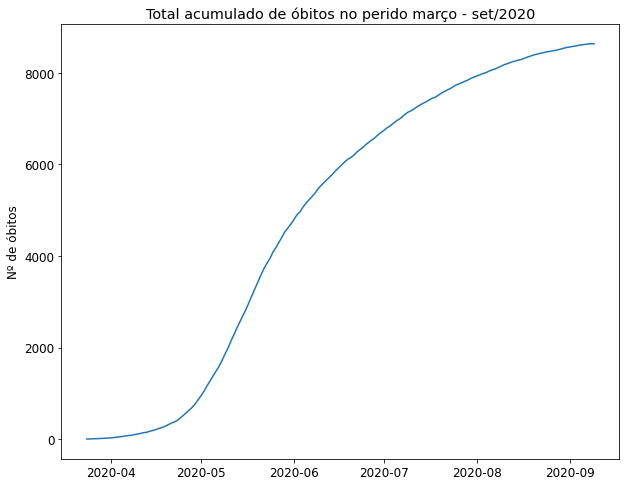

In [202]:
plt.plot( new_df_obit['dataObito'], new_df_obit['totalAcumulado'] )
plt.title('Total acumulado de óbitos no perido março - set/2020')
matplotlib.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (10,8)
plt.ylabel('Nº de óbitos');
plt.show()

**Gráfico 02 - Curva acumulado de casos confirmados acumulados  por período**

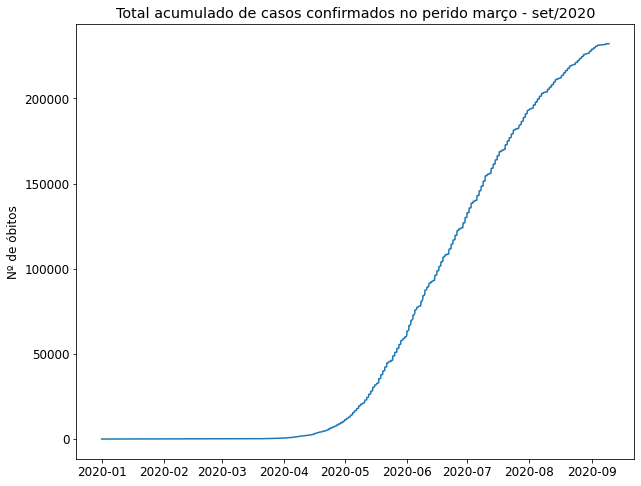

In [264]:
plt.plot( new_df_casos_confirm['dataResultadoExame'], new_df_casos_confirm['totalAcumulado'] )
plt.title('Total acumulado de casos confirmados no perido março - set/2020')
matplotlib.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (10,8)
plt.ylabel('Nº de óbitos');
plt.show()

In [203]:
group_obito_data = df_obito.groupby('dataObito').qtObito.sum()
group_obito_data

dataObito
2020-03-24     3
2020-03-25     2
2020-03-26     3
2020-03-27     3
2020-03-28     2
              ..
2020-09-05     7
2020-09-06     9
2020-09-07    10
2020-09-08     5
2020-09-09     1
Name: qtObito, Length: 170, dtype: int64

In [204]:
# Cálculo para média móvel
df_obito['mediaMovel'] = df_obito.qtObito.rolling(window=7).mean()

**Gráfico 03 - Total de óbitos por dia no período Março - Setembro 2020 (Rezumido )**

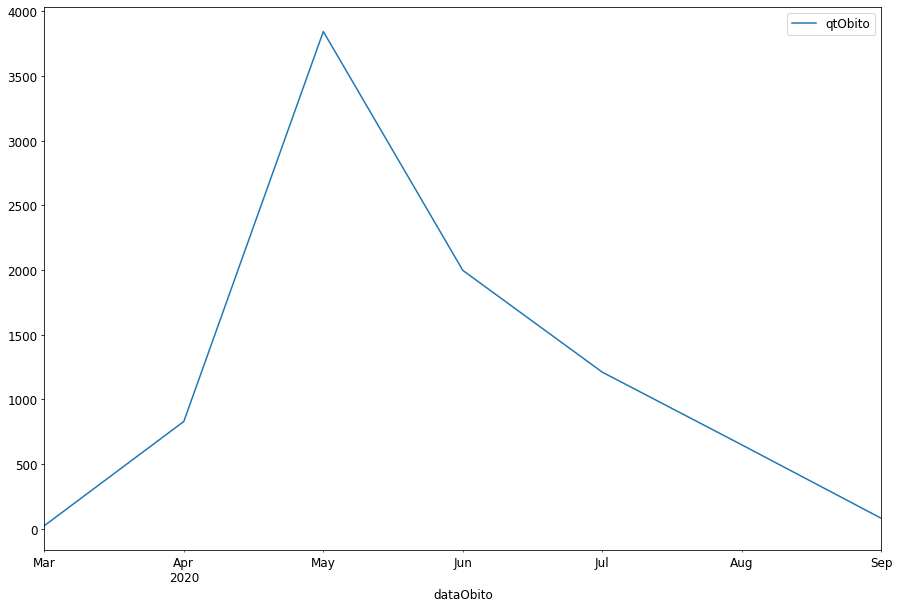

In [205]:
  # agrupar por mes a qtde de obitos e plotar
df_obito.groupby(pd.Grouper(key='dataObito',freq='M')).agg({'qtObito':'sum'}).plot(figsize=(15, 10))

In [206]:
group_acumulado_ob_dia = df_obito.groupby('dataObito')
group_acumulado_ob_dia['dataObito'].count()

dataObito
2020-03-24     3
2020-03-25     2
2020-03-26     3
2020-03-27     3
2020-03-28     2
              ..
2020-09-05     7
2020-09-06     9
2020-09-07    10
2020-09-08     5
2020-09-09     1
Name: dataObito, Length: 170, dtype: int64

**Gráfico 04 - Total de óbitos por dia no período Março - Setembro 2020 (Detalhado)**

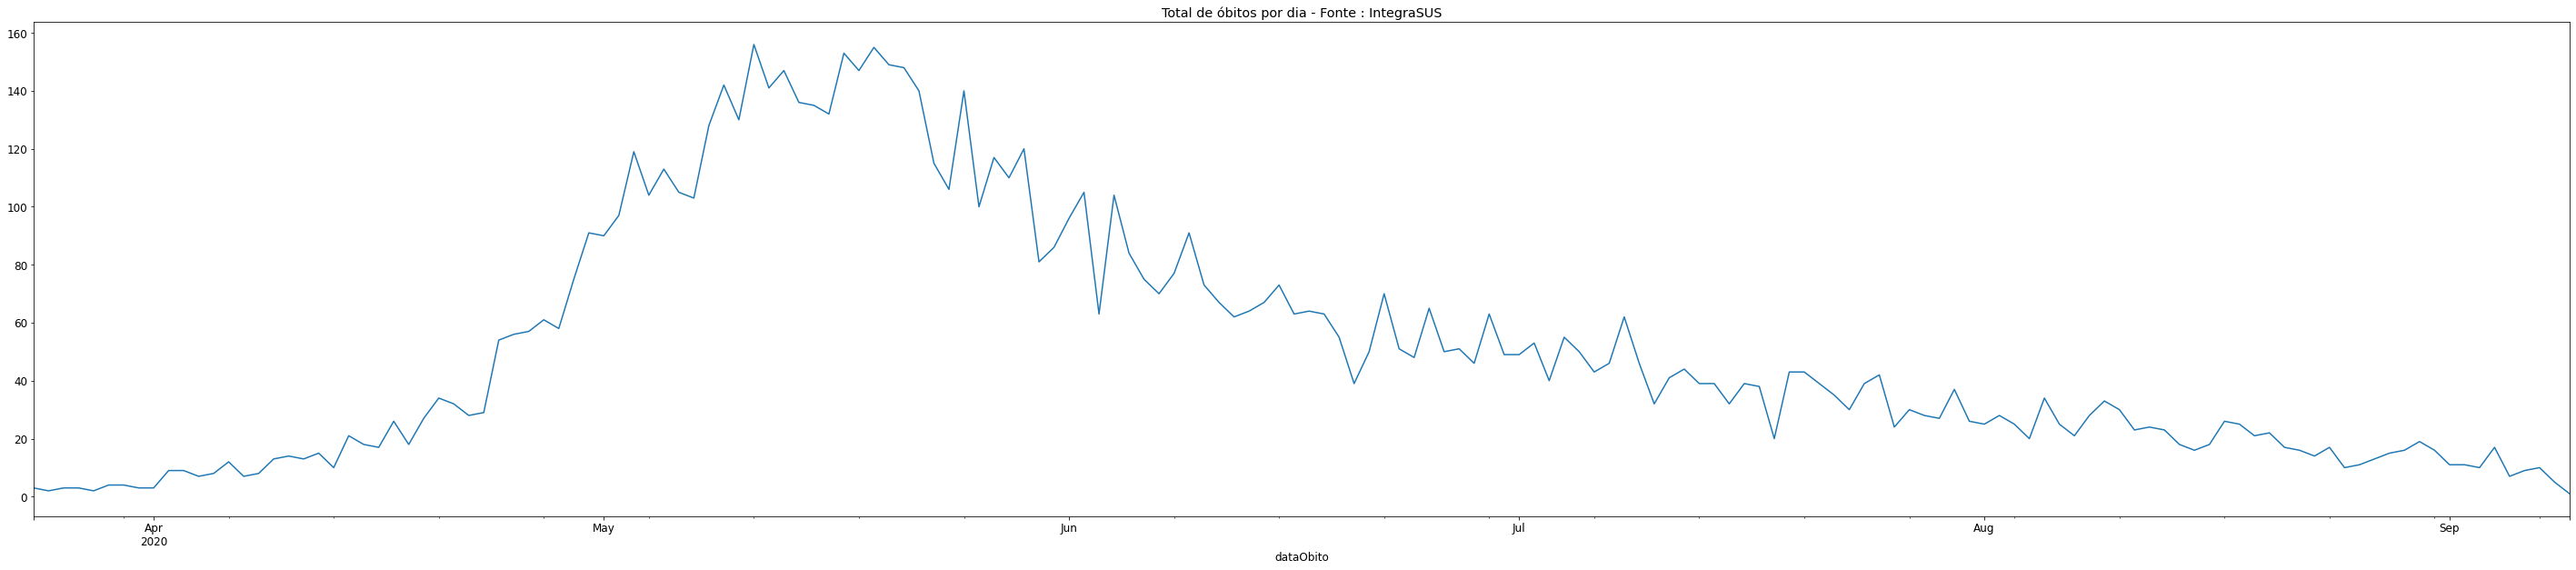

In [207]:
gr_grafico_acumulado_ob_dia = group_acumulado_ob_dia['dataObito'].count()
gr_grafico_acumulado_ob_dia.plot( figsize=(50,10), title = 'Total de óbitos por dia - Fonte : IntegraSUS')

In [208]:
df_confirmados.head(3)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito
25,25,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1
26,26,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1
28,28,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1


**Gráfico 04 - Total de novos casos por dia no período Março - Setembro 2020 (Rezumido )**

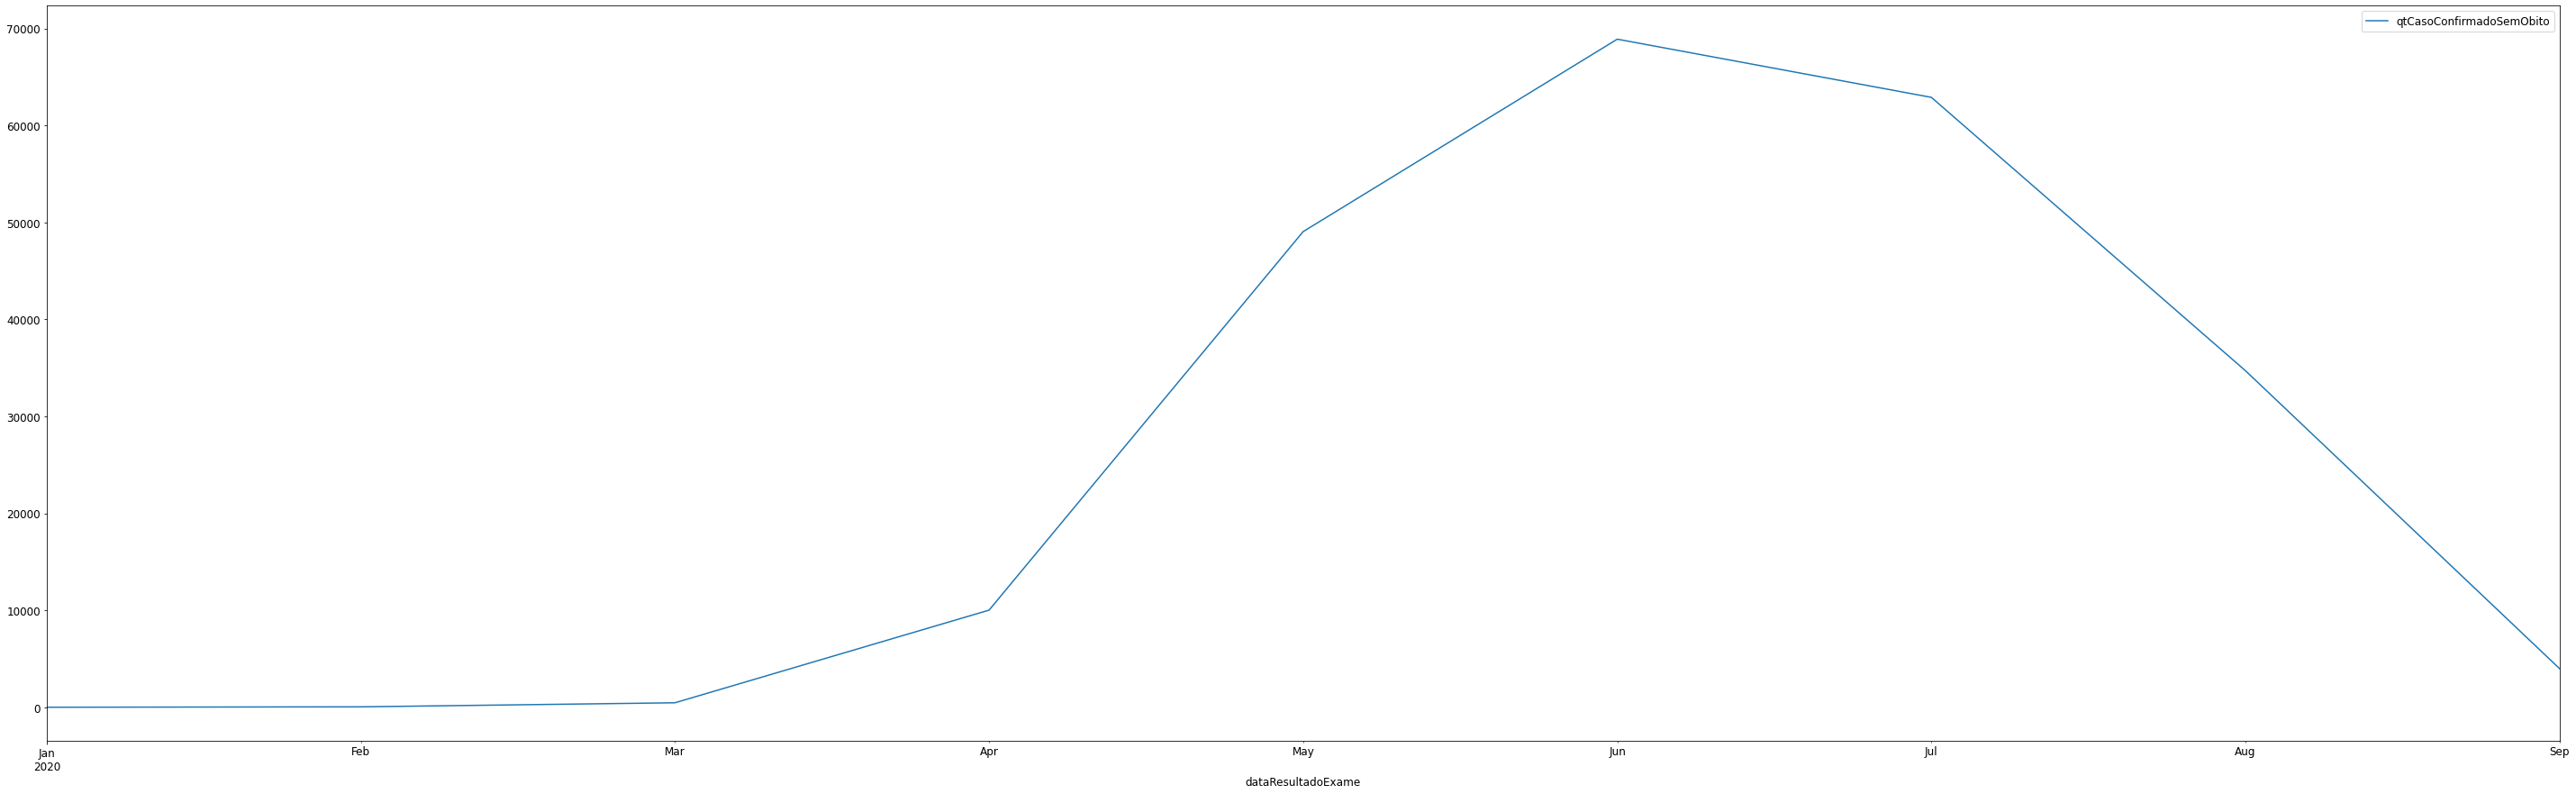

In [209]:
  # agrupar por mes a qtde de casos confirmados SEM óbito e plotar
df_confirmados.groupby(pd.Grouper(key='dataResultadoExame',freq='M')).agg({'qtCasoConfirmadoSemObito':'sum'}).plot(figsize=(50, 15) )

**Preparar para plotagem somente de casos confirmados**

In [210]:
group_confirmados = df_confirmados.groupby(by=df_confirmados['dataResultadoExame'].dt.date).count()
df_confir_graf = group_confirmados['dataResultadoExame']

**Gráfico 04 - Total de novos por dia no período Março - Setembro 2020 Histogram**

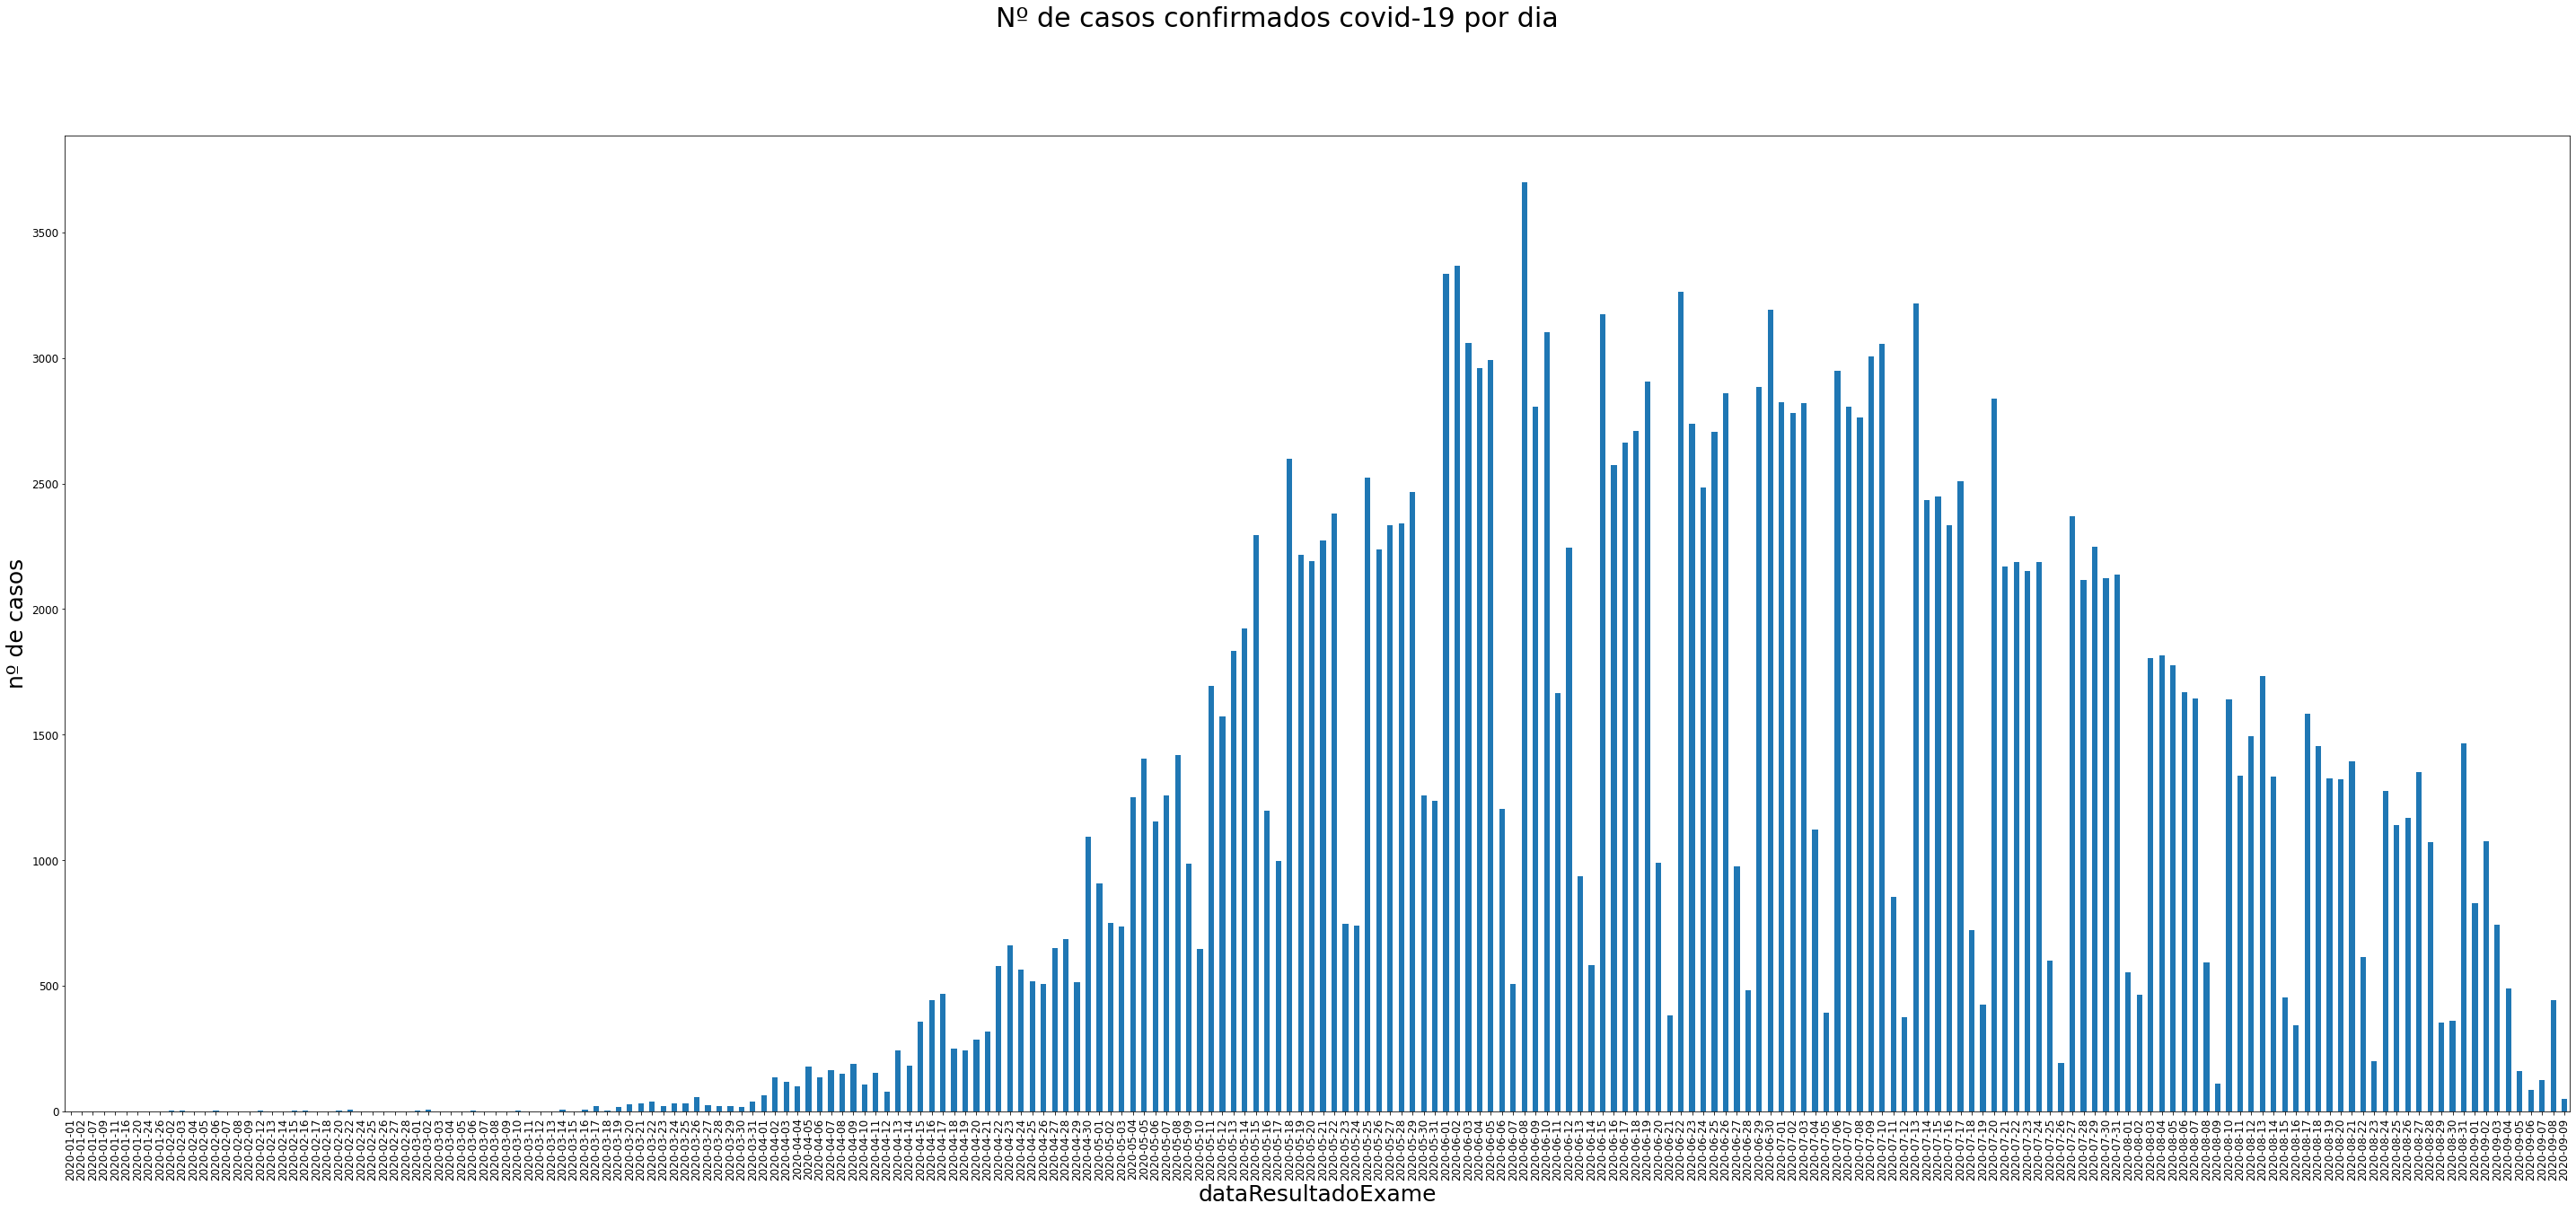

In [211]:
plt.xlabel('Data resultado do exame', fontsize=25) 
plt.ylabel('nº de casos', fontsize=25)
plt.suptitle('Nº de casos confirmados covid-19 por dia', fontsize=30)

df_confir_graf.plot(figsize=(50, 20), kind='bar')

**Preparar para plotagem somente dos óbitos**


In [212]:
group_obito = df_obito.groupby(by=df_obito['dataObito'].dt.date).count()
group_obito

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito,acumulado_obito,mediaMovel
dataObito,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-24,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,0,3,3,2,3,2,2,2,3,2,2,2,2,2,0,0,3,3,3,3,0,0,3,3,3,3,3
2020-03-25,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,2,2,1,1,1,1,1,2,1,1,1,1,1,0,0,2,2,2,2,0,1,2,2,2,2,2
2020-03-26,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,2,1,3,3,2,2,2,2,2,2,3,2,2,2,2,0,0,3,3,3,3,0,0,3,3,3,3,3
2020-03-27,3,3,3,3,3,3,2,3,3,2,3,3,3,3,3,2,3,2,2,1,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,3,3,3,3,1,1,3,3,3,3,3
2020-03-28,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,2,2,2,2,0,0,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-05,7,7,3,7,7,7,5,7,7,4,5,5,7,7,7,5,7,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,7,7,7,7,3,3,7,7,7,7,7
2020-09-06,9,9,4,9,9,9,4,9,8,6,5,6,8,9,9,8,9,4,4,4,2,1,1,1,1,2,1,1,1,1,1,1,2,1,1,0,0,9,9,9,9,3,3,8,9,9,9,9
2020-09-07,10,10,4,10,10,10,7,10,9,6,4,6,10,10,10,9,10,3,2,2,1,0,0,0,1,3,1,1,1,3,1,1,1,1,1,0,0,10,10,10,10,4,4,9,10,10,10,10


**Gráfico 05 - Total de novos óbitos por dia no período Março - Setembro 2020 (Histogram)**

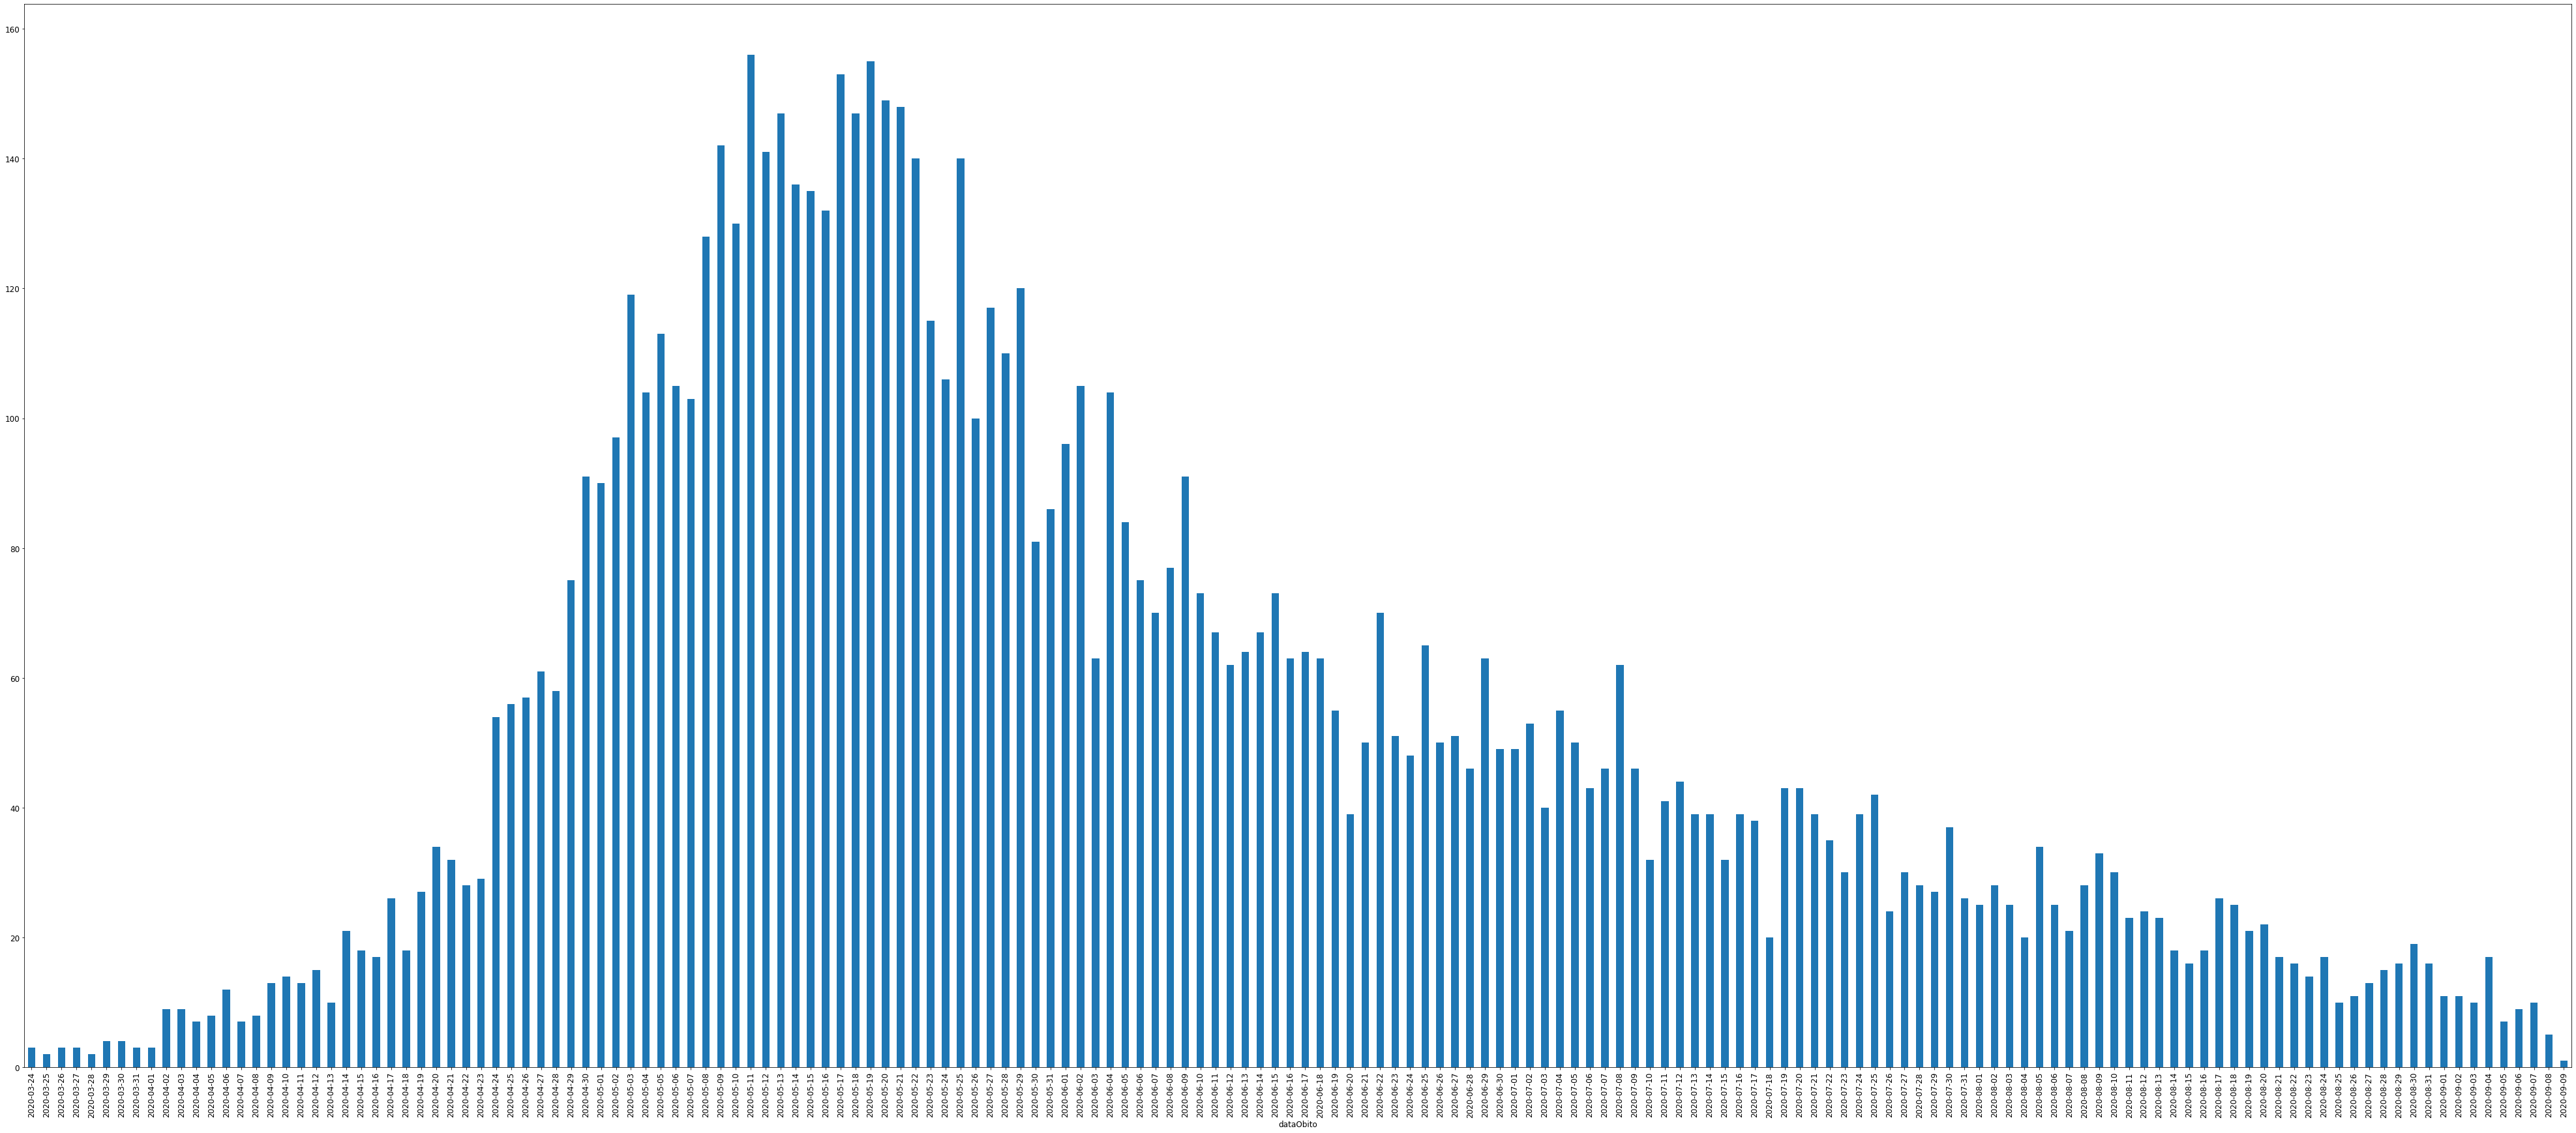

In [213]:
df_ob_graf = group_obito['dataObito']
df_ob_graf.plot(figsize=(70, 30), kind='bar')

In [214]:
group_faixa_idade_obito = df_obito.groupby(by=df_obito['faixaIdade']).count()
group_faixa_idade_obito

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,qtObito,qtCasoConfirmadoSemObito,acumulado_obito,mediaMovel
faixaIdade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-9,16,16,12,16,16,16,13,16,16,13,10,12,16,16,16,16,16,12,11,12,3,1,9,9,2,2,2,2,2,2,4,2,3,2,2,0,0,16,16,16,16,3,4,16,16,16,16
10-19,29,29,20,29,29,29,26,29,29,20,16,18,29,29,29,25,29,17,16,15,10,3,17,17,5,5,5,5,5,5,7,5,5,5,5,0,0,29,29,29,29,12,14,29,29,29,28
20-39,332,332,290,332,331,332,281,332,332,271,185,235,316,332,332,298,332,258,246,233,132,65,240,232,69,83,68,68,72,92,69,67,74,71,79,0,0,332,332,332,332,107,145,332,332,332,331
40-59,1411,1411,1198,1409,1409,1411,1203,1411,1411,1180,845,1027,1334,1411,1411,1286,1411,1085,1030,940,464,267,1034,1013,350,490,363,365,366,527,367,374,376,374,387,0,0,1411,1411,1411,1411,467,626,1411,1411,1411,1411
60-79,3744,3744,3156,3744,3743,3743,3222,3744,3744,3114,2305,2836,3545,3744,3744,3383,3744,2836,2695,2427,1112,608,2696,2627,964,1535,986,980,976,1518,1020,1005,989,1013,981,0,0,3744,3744,3744,3744,1356,1731,3744,3744,3744,3740
80E+,2720,2720,2272,2720,2720,2720,2275,2720,2720,2303,1652,2068,2579,2720,2720,2505,2720,2083,1976,1663,595,271,1992,1954,649,1151,649,649,651,976,736,677,645,669,643,0,0,2720,2720,2720,2720,959,1206,2720,2720,2720,2720


**Gráfico 06 - Contagem de óbitos por faixa de idade no período Março - Setembro 2020 (Resumido)**

In [215]:
counts_obitos_faixa_idade = df_obito.groupby(['faixaIdade', 'sexoPaciente']).faixaIdade.count().unstack()
counts_obitos_faixa_idade

sexoPaciente,FEMININO,MASCULINO
faixaIdade,,
0-9,9,7
10-19,12,17
20-39,135,197
40-59,520,891
60-79,1548,2196
80E+,1267,1453


**Contagem de óbitos por faixa de idade no período Março - Setembro 2020 (Histogram)**

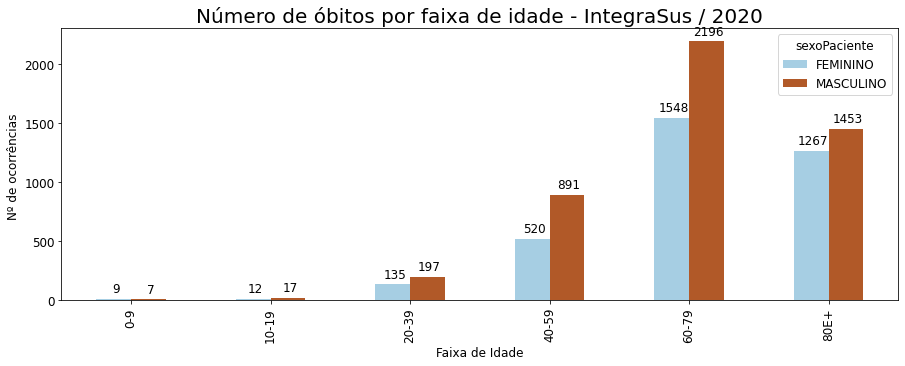

In [216]:
ax = counts_obitos_faixa_idade.plot(kind='bar',stacked = False, colormap = 'Paired', figsize=(15, 5) )

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

plt.xlabel ('Faixa de Idade')
plt.ylabel ('Nº de ocorrências ')
plt.title('Número de óbitos por faixa de idade - IntegraSus / 2020',fontsize=20)
plt.show()

**ConferÊncia para o gráfico acima**


In [217]:
group_faixa_idade_obito = df_obito.groupby('faixaIdade')
group_faixa_idade_obito['faixaIdade'].count()

faixaIdade
0-9        16
10-19      29
20-39     332
40-59    1411
60-79    3744
80E+     2720
Name: faixaIdade, dtype: int64

**Gráfico 07 - Ocorrências de óbito por sexo do paciente (Histogram)**

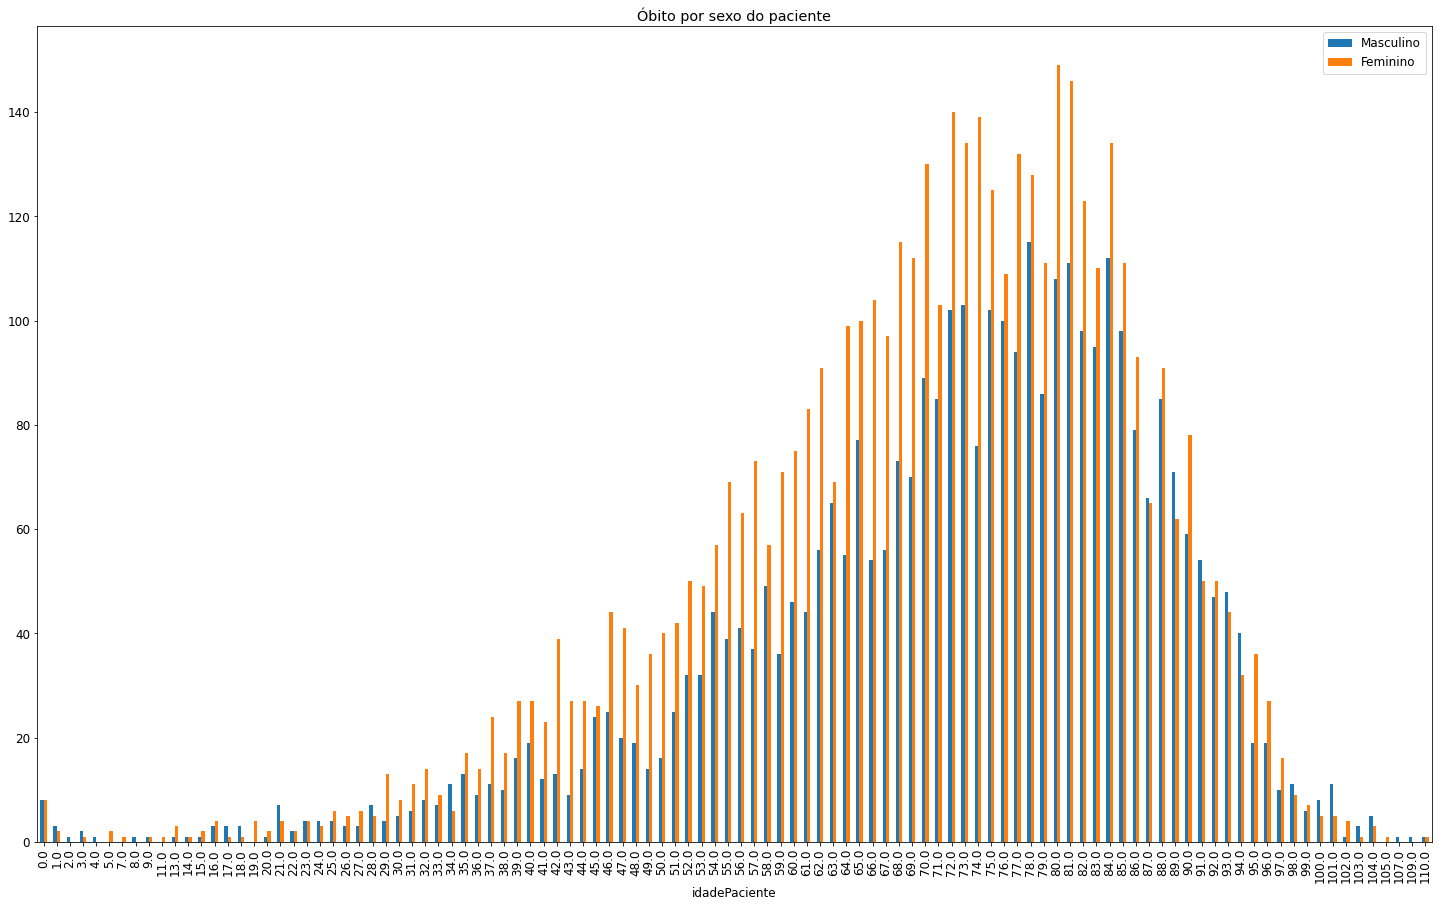

In [218]:
obito_by_sex = df_obito.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
obito_by_sex.columns = ['Masculino', 'Feminino']
obito_by_sex.plot.bar(title='Óbito por sexo do paciente', figsize=(25,15) )

**Gráfico 08 - Distribuição de óbitos por raça/cor do paciente (Pie)**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47960a6208>,
      dtype=object)

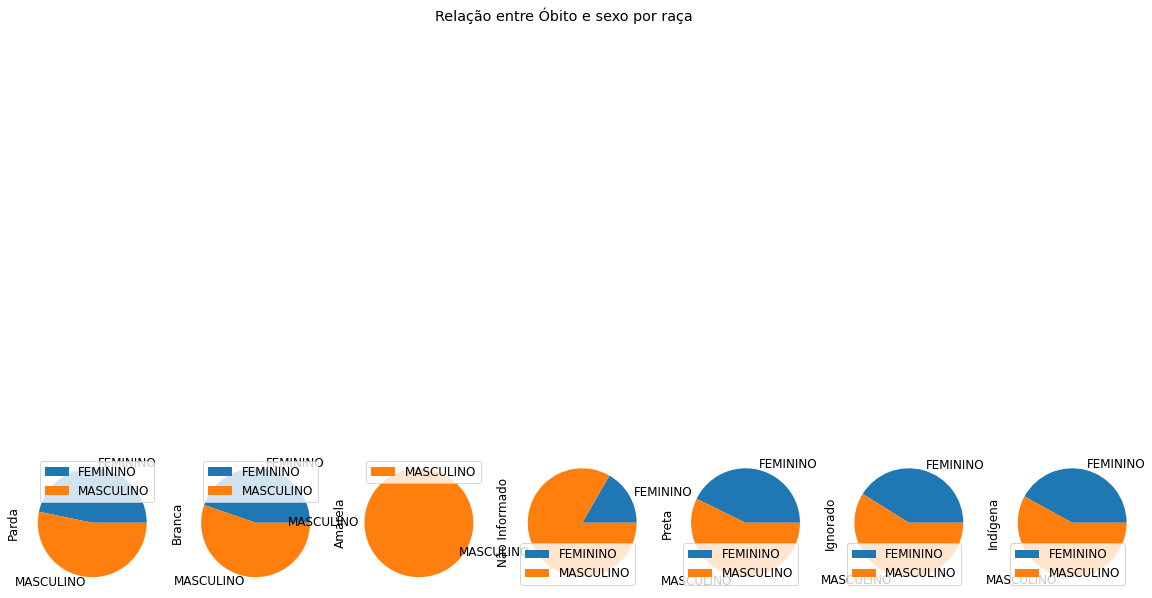

In [219]:
obito_by_sexo = df_obito.groupby([ 'sexoPaciente', 'racaCorPaciente']).size().unstack('racaCorPaciente')
obito_by_sexo.columns =  ['Parda','Branca','Amarela', 'Não Informado','Preta','Ignorado','Indígena']
obito_by_sexo.plot.pie(title='Relação entre Óbito e sexo por raça', figsize=(20,15) , subplots = True  )

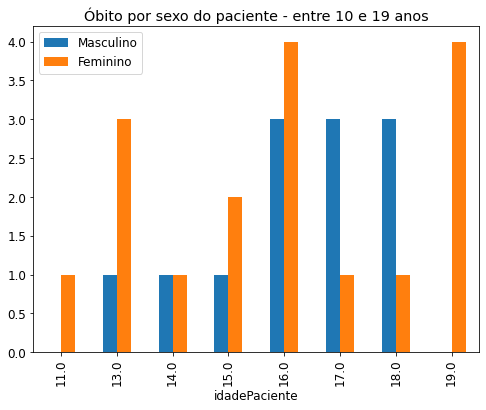

In [220]:
df_obit_faixa1 = df_obito.loc[ (df_obito['faixaIdade'] == '10-19')]
df_obit_plot_faixa1 = df_obit_faixa1.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa1.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa1.plot.bar(title='Óbito por sexo do paciente - entre 10 e 19 anos', figsize=(8,6) )

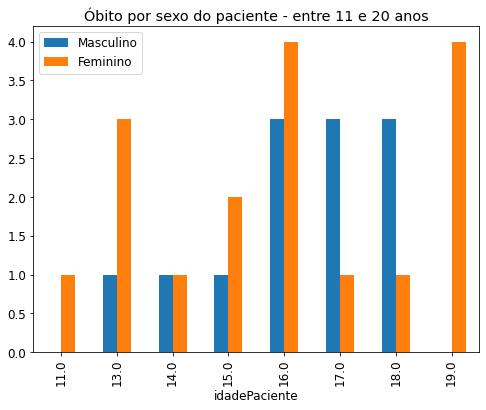

In [221]:
df_obit_faixa2 = df_obito.loc[ (df_obito['faixaIdade'] == '10-19')]
df_obit_plot_faixa2 = df_obit_faixa2.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa2.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa2.plot.bar(title='Óbito por sexo do paciente - entre 11 e 20 anos', figsize=(8,6) )

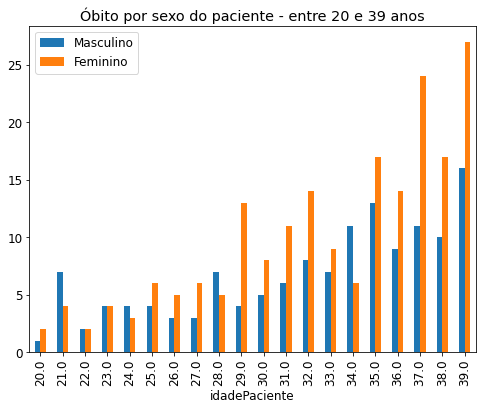

In [222]:
df_obit_faixa3 = df_obito.loc[ (df_obito['faixaIdade'] == '20-39')]
df_obit_plot_faixa3 = df_obit_faixa3.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa3.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa3.plot.bar(title='Óbito por sexo do paciente - entre 20 e 39 anos', figsize=(8,6) )

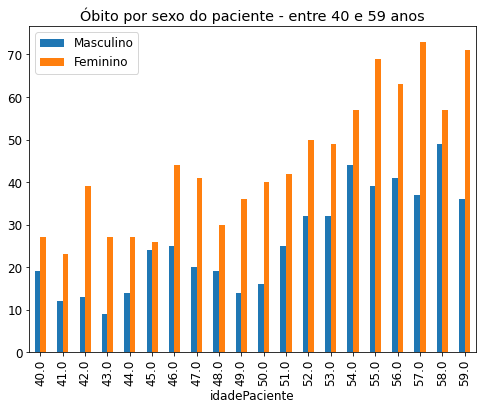

In [223]:
df_obit_faixa4 = df_obito.loc[ (df_obito['faixaIdade'] == '40-59')]
df_obit_plot_faixa4 = df_obit_faixa4.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa4.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa4.plot.bar(title='Óbito por sexo do paciente - entre 40 e 59 anos', figsize=(8,6) )

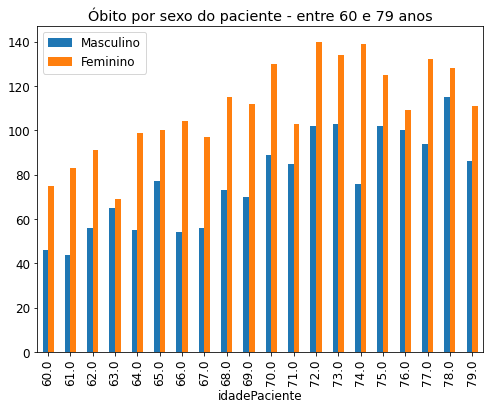

In [224]:
df_obit_faixa5 = df_obito.loc[ (df_obito['faixaIdade'] == '60-79')]
df_obit_plot_faixa5 = df_obit_faixa5.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa5.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa5.plot.bar(title='Óbito por sexo do paciente - entre 60 e 79 anos', figsize=(8,6) )

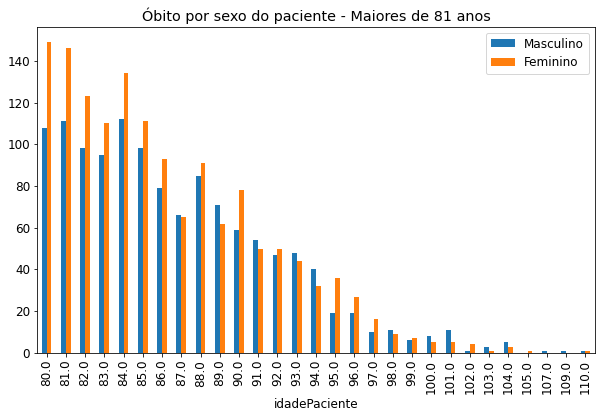

In [225]:
df_obit_faixa9 = df_obito.loc[ (df_obito['faixaIdade'] == '80E+')]
df_obit_plot_faixa9 = df_obit_faixa9.groupby(['idadePaciente', 'sexoPaciente']).size().unstack('sexoPaciente')
df_obit_plot_faixa9.columns = ['Masculino', 'Feminino']
df_obit_plot_faixa9.plot.bar(title='Óbito por sexo do paciente - Maiores de 81 anos', figsize=(10,6) )

# **Gerar dataframe somente para a cidade de Fortaleza**

In [226]:
df.head(3)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito
0,0,c5bae65935fdb19f4e060e80b4e19035,NaN,CE,230110.0,ARACATI,NaN,FEMININO,59.0,2020-05-06,NaT,NaT,NaT,NaN,NaN,2020-04-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,NaN,FORTALEZA,40-59,0,0
1,1,935fa530bd1bec451d80c361c07529e4,NaN,CE,230440.0,FORTALEZA,ALDOETA,FEMININO,42.0,2020-08-27,NaT,NaT,NaT,NaN,NaN,2020-08-13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Ignorado,NaT,2424568,SOBRAL,40-59,0,0
2,2,156942983991b9018c9ca86cbad0a179,NaN,CE,230440.0,FORTALEZA,SAPIRANGA,FEMININO,39.0,2020-06-09,NaT,NaT,NaT,NaN,NaN,2020-06-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,NaN,FORTALEZA,20-39,0,0


In [227]:
df_fortaleza =  df[df['municipioPaciente'] == 'FORTALEZA']

In [228]:
df_fortaleza.head(3)

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito
1,1,935fa530bd1bec451d80c361c07529e4,NaN,CE,230440.0,FORTALEZA,ALDOETA,FEMININO,42.0,2020-08-27,NaT,NaT,NaT,NaN,NaN,2020-08-13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Ignorado,NaT,2424568,SOBRAL,40-59,0,0
2,2,156942983991b9018c9ca86cbad0a179,NaN,CE,230440.0,FORTALEZA,SAPIRANGA,FEMININO,39.0,2020-06-09,NaT,NaT,NaT,NaN,NaN,2020-06-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Parda,NaT,NaN,FORTALEZA,20-39,0,0
4,4,d0327639d182d657cbd375b3ef541da3,BRASIL,CE,230440.0,FORTALEZA,NaN,FEMININO,59.0,NaT,2020-07-23,2020-07-27 14:53:03,2020-07-22,Negativo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,40-59,0,0


In [229]:
# Gerar dataset somente com óbitos de Fortaleza
df_obito_fortaleza = df_fortaleza.loc[df_fortaleza['dataObito'].notnull()  ] 
df_obito_fortaleza

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito
3561,3561,93814d6657e1760df8da381ce4e28951,NaN,CE,230440.0,FORTALEZA,JACARECANGA,MASCULINO,26.0,2020-05-15,NaT,NaT,NaT,NaN,False,2020-05-14,2020-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,Não Informado,Parda,2020-06-15 14:24:28.723,2516640,FORTALEZA,20-39,0,0
3586,3586,28b3326833f756f44f31db0704cad4fa,NaN,CE,230440.0,FORTALEZA,ALDEOTA,FEMININO,91.0,2020-05-23,NaT,2020-05-27 00:00:00,2020-05-23 03:00:00,Negativo,NaN,2020-05-22,2020-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Não Informado,2020-06-01 14:20:22.617,3242587,FORTALEZA,80E+,0,0
3608,3608,cb89647007234eb6667e03394f2de12c,NaN,CE,230440.0,FORTALEZA,CENTRO,MASCULINO,83.0,2020-06-14,NaT,2020-06-14 00:00:00,2020-06-16 06:00:00,Negativo,NaN,2020-06-14,2020-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Parda,2020-06-18 09:50:45.973,6595723,ITAITINGA,80E+,0,0
3677,3677,99a4c5e7a15e479d07c5c59aaa44c9db,NaN,CE,230440.0,FORTALEZA,BOM JARDIM,FEMININO,56.0,2020-05-01,NaT,NaT,NaT,NaN,False,2020-04-30,2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em investigação,Não Informado,Parda,2020-06-11 09:54:40.563,NaN,FORTALEZA,40-59,0,0
3827,3827,9822bc60cdca34675636d9878c087a44,BRASIL,CE,230440.0,FORTALEZA,NaN,MASCULINO,88.0,2020-05-13,2020-05-13,2020-05-27 20:52:21,2020-05-13 06:00:00,Positivo,True,2020-05-08,2020-05-13,3.159052e+11,Em Análise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-05-29 10:56:47.723,7360851,FORTALEZA,80E+,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781865,781865,bec550d4d5e8351a1dc079af700ed7cc,NaN,CE,230440.0,FORTALEZA,VILA UNIÃO,MASCULINO,NaN,NaT,NaT,NaT,2020-05-08 03:00:00,Positivo,True,2020-05-01,2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-06-03 09:55:37.660,NaN,NaN,NaN,1,0
781962,781962,0a4437f3f07a37d7f6b7b448131e371d,NaN,CE,230440.0,FORTALEZA,SAO BENTO,FEMININO,68.0,2020-04-15,2020-05-31,2020-06-06 15:14:53,2020-05-15 03:00:00,Negativo,NaN,2020-04-14,2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Descartado,RT PCR,Não Informado,2020-06-04 10:41:41.270,2497654,FORTALEZA,60-79,0,0
781967,781967,a071600f0653f3eed93b4a430812e35a,BRASIL,CE,230440.0,FORTALEZA,CONJUNTO CEARA 1,FEMININO,75.0,2020-05-08,2020-05-08,2020-05-19 20:05:40,2020-05-17 03:00:00,Positivo,True,2020-05-01,2020-05-17,3.158975e+11,Positivo,2020-05-09 00:00:00.000,2020-05-09 00:00:00.000,2020-05-17 00:00:00.000,Óbito,2020-05-17 00:00:00.000,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado,RT PCR,Não Informado,2020-06-17 15:32:32.893,7360851,FORTALEZA,60-79,1,0
783106,783106,f36f1f887f37bace95ff5cf84d4b597d,BRASIL,CE,230440.0,FORTALEZA,CONJUNTO CEARA,FEMININO,5

In [230]:
# Gerar dataset somente com casos confirmados que não resultaram em óbito somente para Fortaleza
df_confirmados_fortaleza = df_fortaleza[ (df_fortaleza['resultadoFinalExame'] == 'Positivo') & (df_fortaleza['evolucaoCasoSivep'] != 'Óbito' ) ]
df_confirmados_fortaleza

,Unnamed: 0,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,faixaIdade,qtObito,qtCasoConfirmadoSemObito
25,25,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1
26,26,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1
28,28,c1a40d7ff6dbda60767b6e4677f9087a,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,36.0,NaT,2020-06-25,2020-06-26 17:52:31,2020-06-25,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,20-39,0,1
77,77,7880b2cc9abb852bf75f15116e243d32,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,33.0,NaT,NaT,2020-05-30 00:00:00,2020-05-27,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELISA,Não Informado,NaT,NaN,NaN,20-39,0,1
81,81,7880b2cc9abb852bf75f15116e243d32,NaN,CE,230440.0,FORTALEZA,NaN,MASCULINO,33.0,NaT,NaT,2020-05-27 00:00:00,2020-05-27,Positivo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELISA,Não Informado,NaT,NaN,NaN,20-39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790558,790558,80d06e3f548957996e339598cf2b84ae,NaN,CE,230440.0,FORTALEZA,PARANGABA,FEMININO,29.0,2020-05-29,NaT,NaT,2020-05-29,Positivo,NaN,2020-05-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Branca,NaT,9297502,FORTALEZA,20-39,0,1
790574,790574,b1ee098a89ebdd4338c3165c4f318c9b,NaN,CE,230440.0,FORTALEZA,AUTRAN NUNES,FEMININO,49.0,2020-06-12,NaT,2020-06-12 00:00:00,2020-06-12,Positivo,NaN,2020-04-30,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,2529068,FORTALEZA,40-59,0,1
790635,790635,01eec7b8e0eada0a41b81d2578adfd0f,NaN,CE,230440.0,FORTALEZA,ANTONIO DIOGO,FEMININO,52.0,2020-05-18,NaT,2020-05-15 00:00:00,2020-05-15,Positivo,NaN,2020-05-07,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Não Informado,NaT,704001396906565,FORTALEZA,40-59,0,1
790676,790676,2272bb114102302e35a970babd6def2c,NaN,CE,230440.0,FORTALEZA,ITAMARATY,FEMININO,43.0,2020-05-15,NaT,2020-05-15 00:00:00,2020-05-15,Positivo,NaN,2020-05-15,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teste Rápido,Parda,NaT,6597246,EUSEBIO,40-59,0,1


Preparação para contagem por grupos

In [231]:
 # Método 01 de contagem por faixa de idade
 # Contagem de óbitos por faixa etária em Fortaleza
 df_obito_fortaleza.groupby(['faixaIdade','sexoPaciente']).size()

faixaIdade  sexoPaciente
0-9         FEMININO           3
            MASCULINO          2
10-19       FEMININO           5
            MASCULINO          9
20-39       FEMININO          73
            MASCULINO        104
40-59       FEMININO         317
            MASCULINO        558
60-79       FEMININO         881
            MASCULINO       1228
80E+        FEMININO         754
            MASCULINO        692
dtype: int64

In [232]:
 # Método 02 de contagem por faixa de idade
 # Contagem de óbitos por faixa etária em Fortaleza
group_faixa_idade_obito_fortaleza = df_obito_fortaleza.groupby(['faixaIdade','sexoPaciente'])
group_faixa_idade_obito_fortaleza['faixaIdade'].count()

faixaIdade  sexoPaciente
0-9         FEMININO           3
            MASCULINO          2
10-19       FEMININO           5
            MASCULINO          9
20-39       FEMININO          73
            MASCULINO        104
40-59       FEMININO         317
            MASCULINO        558
60-79       FEMININO         881
            MASCULINO       1228
80E+        FEMININO         754
            MASCULINO        692
Name: faixaIdade, dtype: int64

In [233]:
group_obitos_bairro = df_obito_fortaleza.groupby('bairroPaciente')
group_obitos_bairro['bairroPaciente'].count()

bairroPaciente
 CARLITO PAMPLONA          1
 CONJUNTO SÃO CRISTÓVÃO    1
 JANGURUSSU                1
 JARDIM DAS OLIVEIRAS      1
 JOAQUIM TAVORA            1
                          ..
VINCENTE PINZON            1
VL PERI                    1
VOLTA DA BOA VISTA         1
WEYNE                      1
ÁLVARO WEYNE               2
Name: bairroPaciente, Length: 482, dtype: int64

In [234]:
cont_idade_sexo_fortaleza = df_obito_fortaleza.groupby(['faixaIdade','sexoPaciente']).faixaIdade.count().unstack()
print(cont_idade_sexo_fortaleza)

sexoPaciente  FEMININO  MASCULINO
faixaIdade                       
0-9                  3          2
10-19                5          9
20-39               73        104
40-59              317        558
60-79              881       1228
80E+               754        692


In [235]:
cont_idade_sexo_fortaleza

sexoPaciente,FEMININO,MASCULINO
faixaIdade,,
0-9,3,2
10-19,5,9
20-39,73,104
40-59,317,558
60-79,881,1228
80E+,754,692


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f478f3797b8>,
      dtype=object)

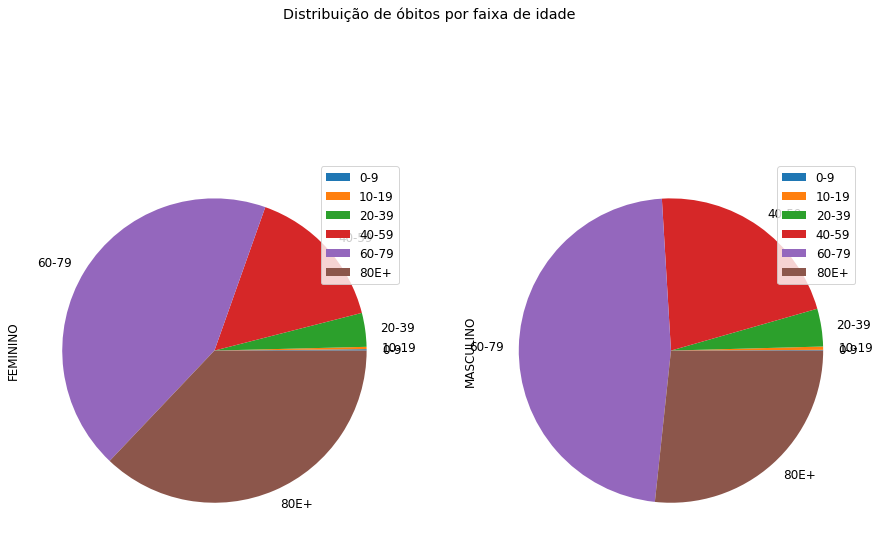

In [236]:
cont_idade_sexo_fortaleza.plot(kind='pie',  figsize=(15,10), title= "Distribuição de óbitos por faixa de idade", subplots = True  )

In [237]:
counts_obitos_faixa_idade_fortaleza = df_obito_fortaleza.groupby(['faixaIdade', 'sexoPaciente']).faixaIdade.count().unstack()
counts_obitos_faixa_idade_fortaleza

sexoPaciente,FEMININO,MASCULINO
faixaIdade,,
0-9,3,2
10-19,5,9
20-39,73,104
40-59,317,558
60-79,881,1228
80E+,754,692


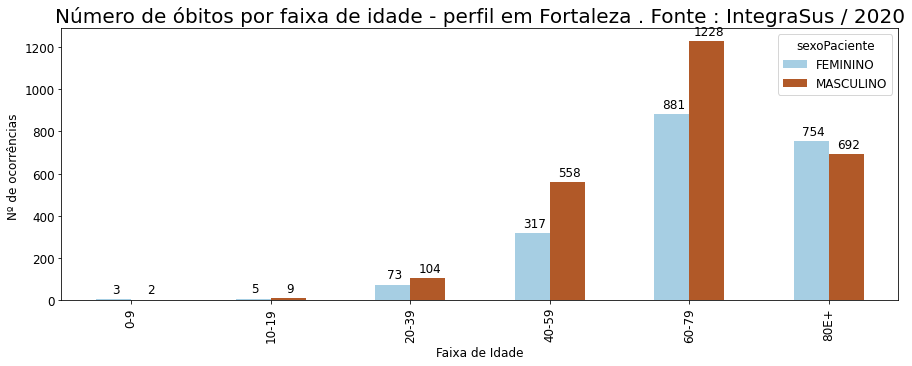

In [238]:
ax = counts_obitos_faixa_idade_fortaleza.plot(kind='bar',stacked = False, colormap = 'Paired', figsize=(15, 5) )

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

plt.xlabel ('Faixa de Idade')
plt.ylabel ('Nº de ocorrências ')
plt.title('Número de óbitos por faixa de idade - perfil em Fortaleza . Fonte : IntegraSus / 2020',fontsize=20)
plt.show()

In [239]:
counts_casos_faixa_idade_fortaleza = df_confirmados_fortaleza.groupby(['faixaIdade', 'sexoPaciente']).faixaIdade.count().unstack()
counts_casos_faixa_idade_fortaleza

sexoPaciente,FEMININO,MASCULINO
faixaIdade,,
0-9,327,351
10-19,602,529
20-39,10068,7695
40-59,10255,8431
60-79,4764,4487
80E+,1239,869


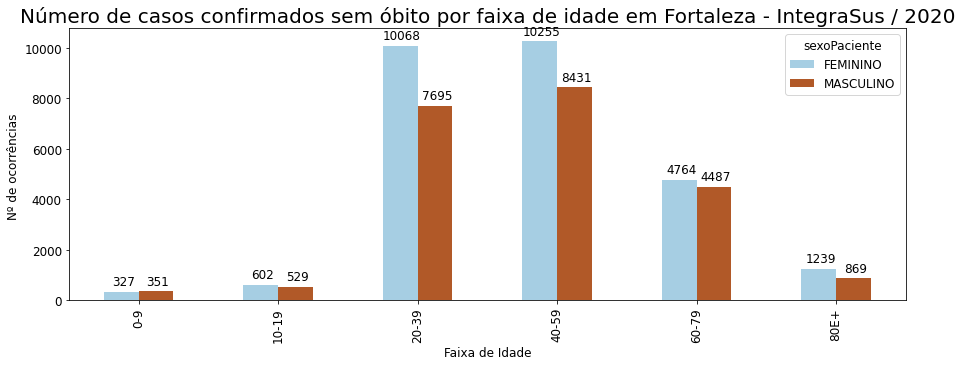

In [240]:
ax_fortal = counts_casos_faixa_idade_fortaleza.plot(kind='bar',stacked = False, colormap = 'Paired', figsize=(15, 5) )

for p in ax_fortal.patches:
        ax_fortal.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

plt.xlabel ('Faixa de Idade')
plt.ylabel ('Nº de ocorrências ')
plt.title('Número de casos confirmados sem óbito por faixa de idade em Fortaleza - IntegraSus / 2020',fontsize=20)
plt.show()

Fazer o merge de dois grupos : casos e obitos para somente Fortaleza

In [241]:
print(type(counts_casos_faixa_idade_fortaleza))

<class 'pandas.core.frame.DataFrame'>


In [242]:
counts_obitos_faixa_idade_fortaleza

sexoPaciente,FEMININO,MASCULINO
faixaIdade,,
0-9,3,2
10-19,5,9
20-39,73,104
40-59,317,558
60-79,881,1228
80E+,754,692


In [243]:
df1 = counts_casos_faixa_idade_fortaleza
df1.head()




sexoPaciente,FEMININO,MASCULINO
faixaIdade,,
0-9,327,351
10-19,602,529
20-39,10068,7695
40-59,10255,8431
60-79,4764,4487


In [244]:
df2 = counts_obitos_faixa_idade_fortaleza
df2.head()

sexoPaciente,FEMININO,MASCULINO
faixaIdade,,
0-9,3,2
10-19,5,9
20-39,73,104
40-59,317,558
60-79,881,1228


In [245]:
 result = pd.concat([df1, df2], axis=1).reindex(df1.index)
 result

sexoPaciente,FEMININO,MASCULINO,FEMININO,MASCULINO
faixaIdade,,,,
0-9,327,351,3,2
10-19,602,529,5,9
20-39,10068,7695,73,104
40-59,10255,8431,317,558
60-79,4764,4487,881,1228
80E+,1239,869,754,692
